In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CoVIDStatewiseCount.csv')
df.tail(38)

,Date,State,Confirmed,Recovered,Death,Active
134,2020-03-30,Total,1318,137,34,1147
135,2020-03-30,Maharashtra,220,39,10,171
136,2020-03-30,Kerala,234,20,1,213
137,2020-03-30,Karnataka,91,5,3,83
138,2020-03-30,Delhi,97,6,2,89
139,2020-03-30,Uttar Pradesh,96,17,0,79
140,2020-03-30,Telangana,77,14,2,61
141,2020-03-30,Gujarat,70,3,6,61
142,2020-03-30,Rajasthan,69,3,0,66
143,2020-03-30,Tamil Nadu,67,4,1,62


In [4]:
df_total = df.loc[df["State"]=="Total",:]
# df_total

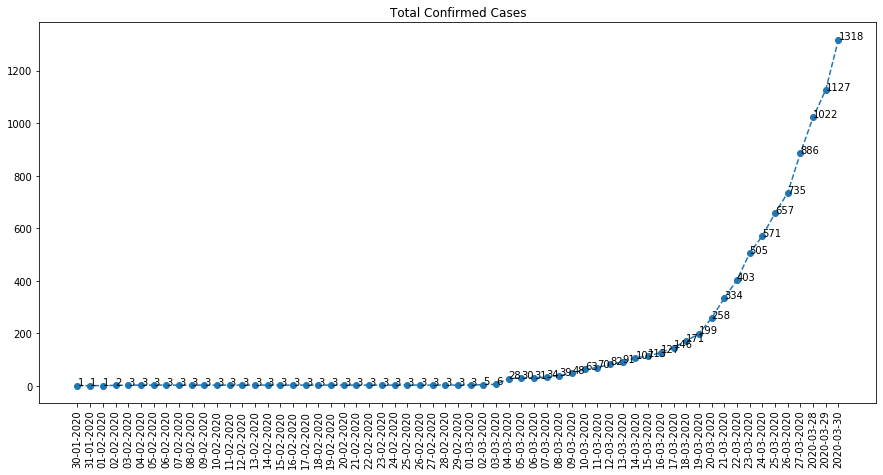

In [5]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Total Confirmed Cases')
ax.plot(df_total['Date'], df_total['Confirmed'], marker='o', linestyle='--')

for i,j in zip(df_total['Date'], df_total['Confirmed']):
    plt.text(i,j, str(j))
plt.xticks(rotation=90)
plt.show()

# fig, ax = plt.subplots(figsize=(15,5))
# sns.plot(x=df_total["Date"], y=df_total['Active'])

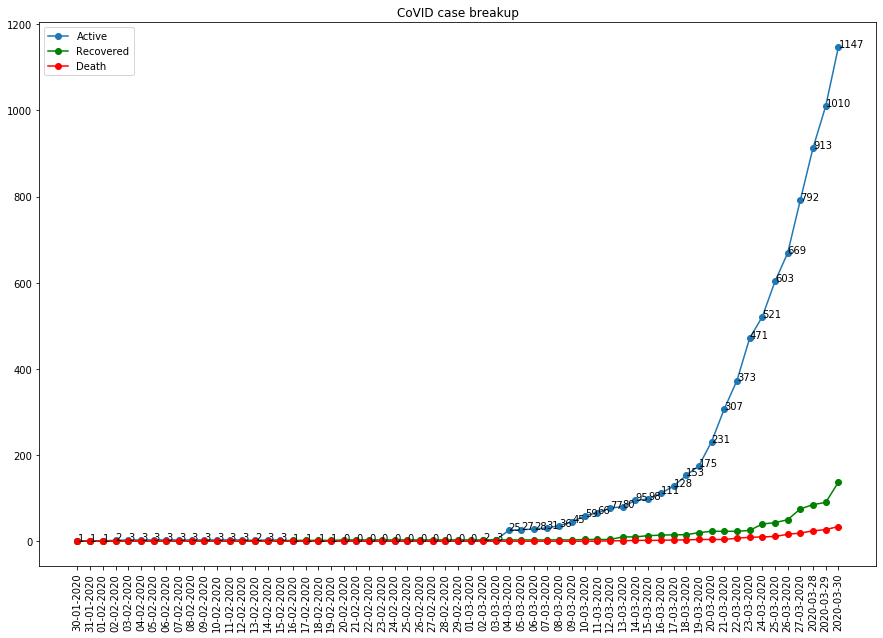

In [7]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('CoVID case breakup')

ax.plot(df_total['Date'], df_total['Active'], marker='o')
for i,j in zip(df_total['Date'], df_total['Active']):
    plt.text(i,j, str(j))
    
ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Active', 
            'Recovered',   
            'Death'])
plt.xticks(rotation=90)
plt.show()